In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



Импорт данных

In [42]:
def import_dataset_from_file(path_to_file: str) -> pd.DataFrame:
    """
    Функция импортирования исходных данных.
    :param path_to_file: путь к загружаемому файлу;
    :return: структура данных.
    """
    dataset = pd.read_table(path_to_file, delim_whitespace=True, names=['x', 'y', 'z'])

    return dataset

Map_1 = pd.DataFrame(import_dataset_from_file('Map_1.txt'))
Map_2 = pd.DataFrame(import_dataset_from_file('Map_2.txt'))
Map_3 = pd.DataFrame(import_dataset_from_file('Map_3.txt'))
Map_4 = pd.DataFrame(import_dataset_from_file('Map_4.txt'))
Map_5 = pd.DataFrame(import_dataset_from_file('Map_5.txt'))
Point_dataset = pd.DataFrame(import_dataset_from_file('Point_dataset.txt'))

In [43]:
Map_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196495 entries, 0 to 1196494
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1196495 non-null  float64
 1   y       1196495 non-null  float64
 2   z       1196495 non-null  float64
dtypes: float64(3)
memory usage: 27.4 MB


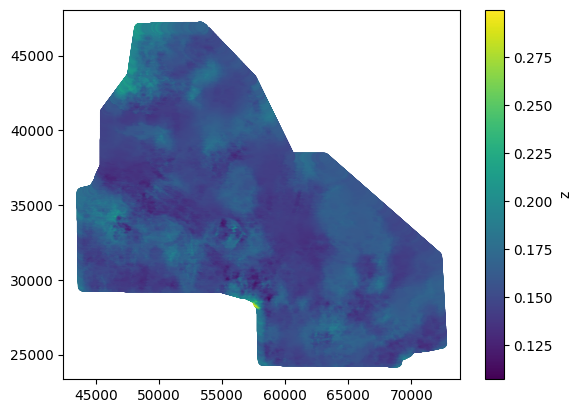

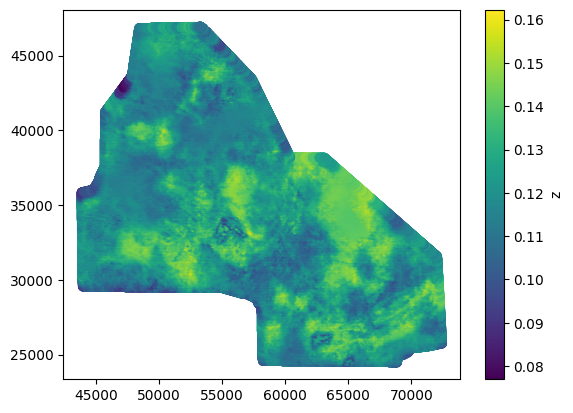

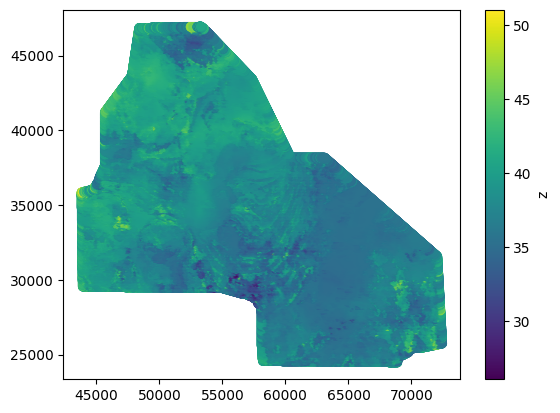

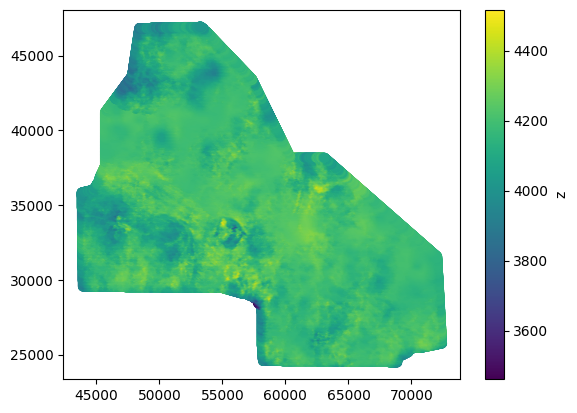

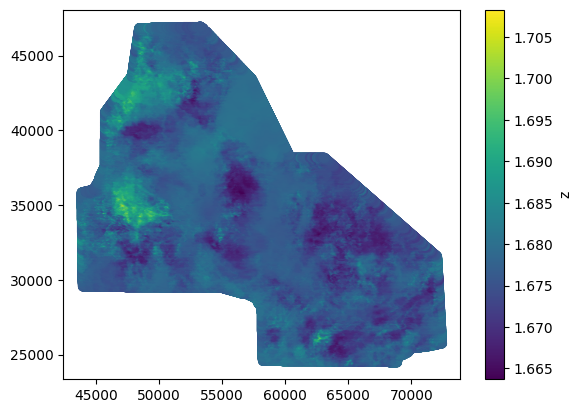

In [44]:

def make_map(dataset):
    x = dataset['x']
    y = dataset['y']
    z = dataset['z']
    plt.scatter(x, y, c=z)
    plt.colorbar(label='z')
    plt.show()

#make_map(Map_1), make_map(Map_2), make_map(Map_3), make_map(Map_4), make_map(Map_5) # долго капец

Map_1 = Map_1.rename(columns={'z': 'z1'})
Map_2 = Map_2.rename(columns={'z': 'z2'})
Map_3 = Map_3.rename(columns={'z': 'z3'})
Map_4 = Map_4.rename(columns={'z': 'z4'})
Map_5 = Map_5.rename(columns={'z': 'z5'})

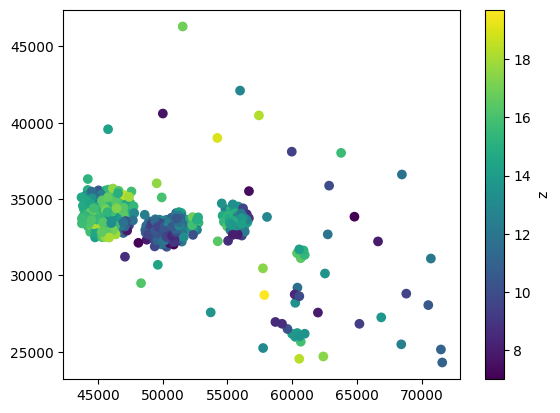

In [45]:
make_map(Point_dataset)

In [46]:
Point_dataset

,x,y,z
0,44222.21,35600.90,14.974396
1,60003.40,26172.72,14.078868
2,44300.61,35291.79,14.261570
3,52776.47,33453.18,15.347562
4,49636.39,30697.34,14.422570
...,...,...,...
436,65193.40,26832.74,9.374795
437,50022.04,40606.42,7.636603
438,43745.18,35114.25,14.622497
439,71483.43,25152.76,11.014532


In [47]:
data = pd.merge(Map_1, Map_2, left_on=['x', 'y'], right_on=['x', 'y'])
data = pd.merge(data, Map_3, left_on=['x', 'y'], right_on=['x', 'y'])
data = pd.merge(data, Map_4, left_on=['x', 'y'], right_on=['x', 'y'])
data = pd.merge(data, Map_5, left_on=['x', 'y'], right_on=['x', 'y'])
print(data)
data1 = pd.merge(data, Point_dataset, how='outer', left_on=['x', 'y'], right_on=['x', 'y']) # это удалить надо будет
print(data1, data1.info())
# data и Point_dataset не имеют пересекающихся точек x, y

                x        y       z1       z2        z3         z4       z5
0        68239.21  24467.0  0.15633  0.11137  40.34349  4142.3389  1.67671
1        68251.71  24467.0  0.15675  0.11094  40.47934  4139.9224  1.67665
2        68264.21  24467.0  0.15718  0.11095  40.69317  4138.2324  1.67664
3        68276.71  24467.0  0.15698  0.11070  40.84084  4138.5000  1.67664
4        68289.21  24467.0  0.15696  0.11088  41.04373  4138.9688  1.67669
...           ...      ...      ...      ...       ...        ...      ...
1196458  53239.21  46942.0  0.16870  0.11056  41.69809  4022.7290  1.67625
1196459  53251.71  46942.0  0.16834  0.11066  37.70777  4022.9558  1.67616
1196460  53264.21  46942.0  0.16873  0.10918  37.66273  4022.3235  1.67590
1196461  53276.71  46942.0  0.16878  0.10950  37.21101  4023.4590  1.67592
1196462  53289.21  46942.0  0.16954  0.10861  40.98548  4016.9272  1.67587

[1196463 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196904 entries, 0 to 

In [48]:
data

,x,y,z1,z2,z3,z4,z5
0,68239.21,24467.0,0.15633,0.11137,40.34349,4142.3389,1.67671
1,68251.71,24467.0,0.15675,0.11094,40.47934,4139.9224,1.67665
2,68264.21,24467.0,0.15718,0.11095,40.69317,4138.2324,1.67664
3,68276.71,24467.0,0.15698,0.11070,40.84084,4138.5000,1.67664
4,68289.21,24467.0,0.15696,0.11088,41.04373,4138.9688,1.67669
...,...,...,...,...,...,...,...
1196458,53239.21,46942.0,0.16870,0.11056,41.69809,4022.7290,1.67625
1196459,53251.71,46942.0,0.16834,0.11066,37.70777,4022.9558,1.67616
1196460,53264.21,46942.0,0.16873,0.10918,37.66273,4022.3235,1.67590
1196461,53276.71,46942.0,0.16878,0.10950,37.21101,4023.4590,1.67592


In [49]:
columns = ['x', 'y', 'z1', 'z2', 'z3', 'z4', 'z5']
for i in columns:
    data[i] = data[i].astype(np.float32)
data

for i in columns:
    print(i,'min', data[i].min(), 'max', data[i].max(), 'median', data[i].median() )
    print('mean', data[i].mean(), 'std', data[i].std())



x min 43839.21 max 72439.21 median 56526.71
mean 57077.184 std 7318.7754
y min 24467.0 max 46942.0 median 33767.0
mean 34368.668 std 5390.9194
z1 min 0.10728 max 0.2996 median 0.15452
mean 0.15573128 std 0.012026057
z2 min 0.07695 max 0.1623 median 0.12236
mean 0.123908356 std 0.0111217555
z3 min 26.05318 max 51.06692 median 37.62269
mean 37.872723 std 2.2727215
z4 min 3461.601 max 4517.0317 median 4189.403
mean 4180.0293 std 64.43013
z5 min 1.66369 max 1.70829 median 1.67706
mean 1.6771472 std 0.0043331175


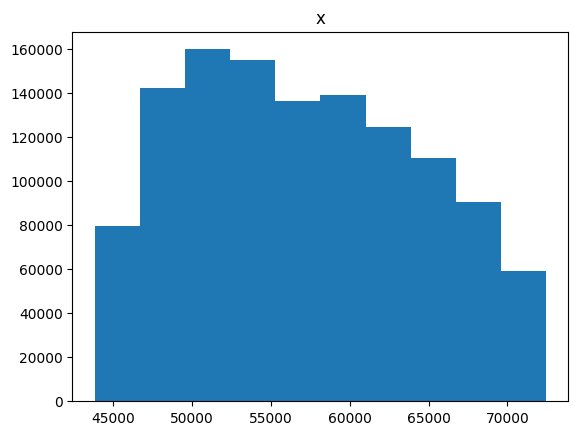

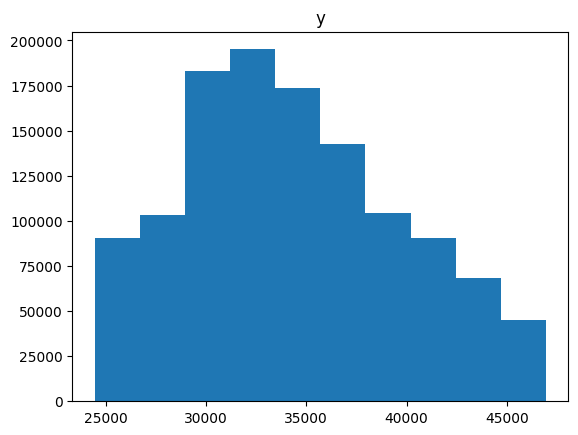

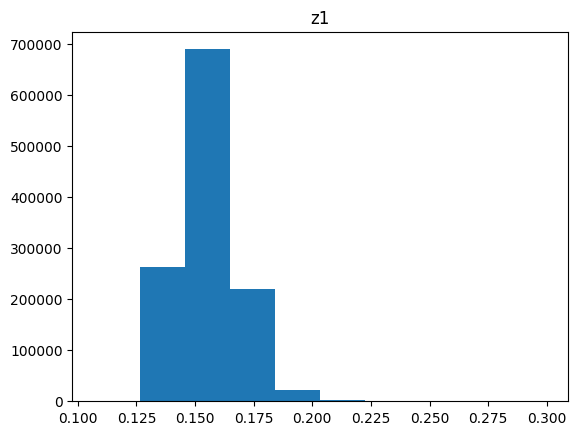

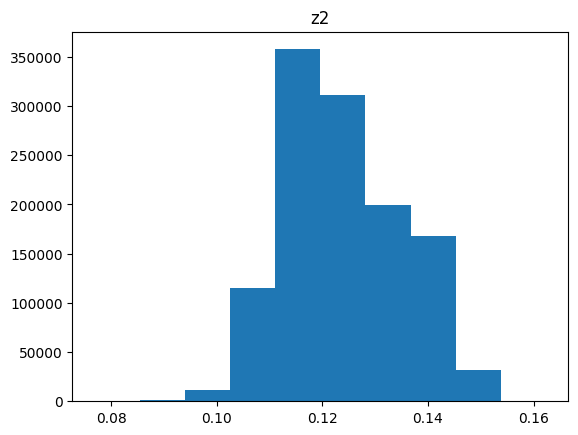

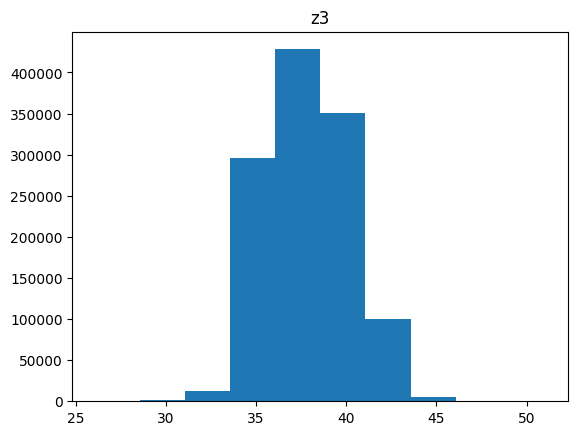

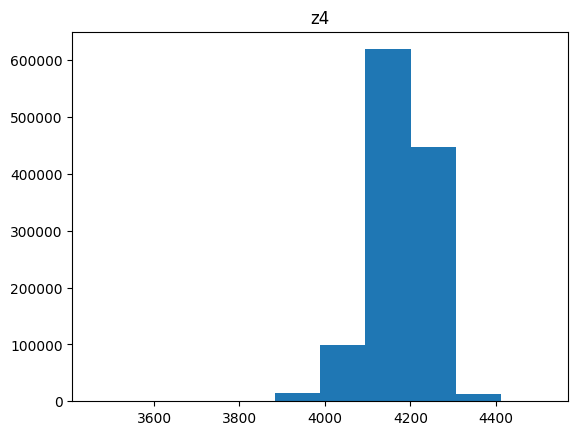

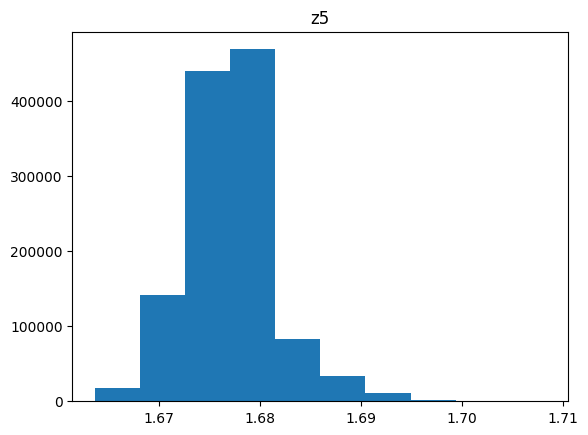

In [50]:
for i in columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()


In [51]:
"""def make_one_map(dataset): 
    x = dataset['x']
    y = dataset['y']
    z1 = dataset['z1']
    z2 = dataset['z2']
    z3 = dataset['z3']
    z4 = dataset['z4']
    z5 = dataset['z5']
    plt.scatter(x, y, c=z1)
    plt.scatter(x, y, c=z2)
    plt.scatter(x, y, c=z3)
    plt.scatter(x, y, c=z4)
    plt.scatter(x, y, c=z5)
    plt.colorbar(label='z')
    plt.show()

make_one_map(data)"""

"def make_one_map(dataset): \n    x = dataset['x']\n    y = dataset['y']\n    z1 = dataset['z1']\n    z2 = dataset['z2']\n    z3 = dataset['z3']\n    z4 = dataset['z4']\n    z5 = dataset['z5']\n    plt.scatter(x, y, c=z1)\n    plt.scatter(x, y, c=z2)\n    plt.scatter(x, y, c=z3)\n    plt.scatter(x, y, c=z4)\n    plt.scatter(x, y, c=z5)\n    plt.colorbar(label='z')\n    plt.show()\n\nmake_one_map(data)"

In [52]:
data['x'], Point_dataset['x'] 

def replace_closest_values(arr1, arr2):
    replaced_arr = np.zeros_like(arr2)

    for i, val in enumerate(arr2):
        closest_val = find_closest_value(val, arr1)
        replaced_arr[i] = closest_val

    return replaced_arr

def find_closest_value(val, arr):
    return arr[np.abs(arr - val).argmin()]



Point_dataset_new_x = replace_closest_values(data['x'], Point_dataset['x'])
Point_dataset_new_y = replace_closest_values(data['y'], Point_dataset['y'])

from sklearn.metrics import r2_score

r2_x = r2_score(Point_dataset['x'], Point_dataset_new_x)
r2_y = r2_score(Point_dataset['y'], Point_dataset_new_y)
r2_x, r2_y

(0.9999982339488196, 0.9999760306402811)

In [56]:
Point_dataset['x'] = Point_dataset_new_x
Point_dataset['y'] = Point_dataset_new_y
Point_dataset

,x,y,z
0,44226.710938,35592.0,14.974396
1,60001.710938,26167.0,14.078868
2,44301.710938,35292.0,14.261570
3,52776.710938,33442.0,15.347562
4,49639.210938,30692.0,14.422570
...,...,...,...
436,65189.210938,26842.0,9.374795
437,50026.710938,40617.0,7.636603
438,43839.210938,35117.0,14.622497
439,71489.210938,25142.0,11.014532


In [57]:
data2 = pd.merge(data, Point_dataset, how='inner', left_on=['x', 'y'], right_on=['x', 'y'])
data2

,x,y,z1,z2,z3,z4,z5,z
0,60551.710938,24542.0,0.15961,0.10619,35.078979,4122.215332,1.67992,18.350161
1,62401.710938,24692.0,0.15494,0.10972,38.560799,4144.411133,1.67982,17.454595
2,68426.710938,25492.0,0.13984,0.12593,36.600670,4248.906738,1.67855,12.477490
3,60664.210938,25667.0,0.15052,0.10564,37.928638,4188.444824,1.68044,15.889690
4,60239.210938,25992.0,0.15246,0.11363,36.912170,4179.922852,1.67824,13.782886
...,...,...,...,...,...,...,...,...
427,45789.210938,39567.0,0.14644,0.12014,36.518219,4184.291992,1.67737,14.307216
428,57439.210938,40492.0,0.16472,0.11520,39.768799,4231.928711,1.67986,18.224100
429,50026.710938,40617.0,0.16269,0.13639,41.534500,4174.121582,1.67097,7.636603
430,55976.710938,42117.0,0.15058,0.12066,40.092590,4201.043945,1.67995,12.769803


In [60]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

x = data2[columns]
y = data2['z']

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.2)
regr = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=mse)
models, prediction = regr.fit(Xtrain, Xtest, ytrain, ytest)
models

  0%|          | 0/42 [00:00<?, ?it/s]

 48%|████▊     | 20/42 [00:01<00:01, 18.89it/s]d:\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 62%|██████▏   | 26/42 [00:01<00:00, 19.43it/s]d:\Python\Lib\site-packages\sklearn\linear_model\_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
100%|██████████| 42/42 [00:04<00:00,  8.57it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken,mean_squared_error
Model,,,,,
XGBRegressor,0.92,0.93,0.84,1.12,0.71
HistGradientBoostingRegressor,0.91,0.91,0.93,0.14,0.86
LGBMRegressor,0.90,0.90,0.97,0.05,0.94
RandomForestRegressor,0.89,0.90,0.98,0.51,0.96
GradientBoostingRegressor,0.88,0.89,1.04,0.25,1.08
BaggingRegressor,0.88,0.89,1.04,0.06,1.09
ExtraTreesRegressor,0.87,0.88,1.07,0.24,1.14
AdaBoostRegressor,0.85,0.86,1.16,0.11,1.34
KNeighborsRegressor,0.80,0.82,1.35,0.01,1.81


In [61]:
from catboost import CatBoostRegressor
model_cb = CatBoostRegressor()
model_cb.fit(Xtrain, ytrain)
y_model = model_cb.predict(Xtest)
mse(ytest, y_model)

Learning rate set to 0.034606
0:	learn: 2.6752877	total: 67.3ms	remaining: 1m 7s
1:	learn: 2.6238499	total: 68.5ms	remaining: 34.2s
2:	learn: 2.5668107	total: 69.5ms	remaining: 23.1s
3:	learn: 2.5089796	total: 70.5ms	remaining: 17.5s
4:	learn: 2.4526552	total: 71.5ms	remaining: 14.2s
5:	learn: 2.4020231	total: 72.5ms	remaining: 12s
6:	learn: 2.3502568	total: 73.4ms	remaining: 10.4s
7:	learn: 2.3022299	total: 74.4ms	remaining: 9.23s
8:	learn: 2.2533805	total: 75.4ms	remaining: 8.3s
9:	learn: 2.2083869	total: 76.4ms	remaining: 7.56s
10:	learn: 2.1623409	total: 77.2ms	remaining: 6.95s
11:	learn: 2.1215122	total: 78.2ms	remaining: 6.43s
12:	learn: 2.0782836	total: 79ms	remaining: 6s
13:	learn: 2.0406159	total: 79.9ms	remaining: 5.63s
14:	learn: 2.0009040	total: 80.8ms	remaining: 5.31s
15:	learn: 1.9655377	total: 81.8ms	remaining: 5.03s
16:	learn: 1.9327850	total: 82.8ms	remaining: 4.79s
17:	learn: 1.8937586	total: 83.7ms	remaining: 4.57s
18:	learn: 1.8585015	total: 84.6ms	remaining: 4.37s


0.9918574519781536